## Problem1

A glass manufacturing plant uses different earth elements to design new glass materials based on customer requirements.   
For that, they would like to automate the process of classification as it’s a tedious job to manually classify them.   
Help the company achieve its objective by correctly classifying the glass type based on the other features   
using KNN algorithm  

In [32]:
import pandas as pd
import numpy as np

glass = pd.read_csv("glass.csv")

In [33]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [34]:
glass['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

there are 6 types of glass. Target variable has 6 classes

In [35]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [36]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

In [37]:
glass.iloc[:, :9]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [38]:
# Normalized data frame (considering the numerical part of data)
glass_n = norm_func(glass.iloc[:, :9])
glass_n.describe() 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.316744,0.402684,0.597891,0.359784,0.507310,0.080041,0.327785,0.055570,0.111783
std,0.133313,0.122798,0.321249,0.155536,0.138312,0.105023,0.132263,0.157847,0.191056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235843,0.327444,0.471047,0.280374,0.441071,0.019726,0.261152,0.000000,0.000000
50%,0.286655,0.386466,0.775056,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000
75%,0.351514,0.465414,0.801782,0.417445,0.585268,0.098229,0.347816,0.000000,0.196078
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
#target vaiablr counts
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [40]:
X = np.array(glass_n.iloc[:,:]) # Predictors 
Y = np.array(glass['Type']) # Target

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [42]:
pd.DataFrame(Y_train).value_counts()

2    58
1    57
7    24
3    13
5    11
6     8
dtype: int64

In [43]:
pd.DataFrame(Y_test).value_counts()

2    18
1    13
7     5
3     4
5     2
6     1
dtype: int64

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)

pred = knn.predict(X_test)
pred

array([2, 1, 2, 5, 1, 1, 2, 7, 2, 1, 7, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 7,
       1, 1, 2, 2, 1, 2, 1, 5, 2, 1, 2, 2, 1, 7, 1, 2, 1, 2, 1, 1, 1],
      dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score
# accuracy on training data 
pred_train = knn.predict(X_train)
accuracy_score(Y_train, pred_train)

0.6666666666666666

In [46]:
# Evaluate the model
# accuracy on test data 
accuracy_score(Y_test, pred)

0.6511627906976745

In [47]:
pd.crosstab(Y_train, pred_train, rownames=['Actual'], colnames = ['Predictions']) 

Predictions,1,2,3,5,6,7
Actual,,,,,,
1,50,6,1,0,0,0
2,19,36,0,3,0,0
3,9,4,0,0,0,0
5,0,3,0,3,1,4
6,1,0,0,2,5,0
7,2,1,0,0,1,20


In [48]:
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames= ['Predictions']) 

Predictions,1,2,5,7
Actual,,,,
1,11,2,0,0
2,5,13,0,0
3,2,2,0,0
5,1,0,1,0
6,0,0,0,1
7,0,1,1,3


In [49]:
# creating empty list variable 
acc = []

In [50]:
# running KNN algorithm for 3 to 70 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(3,70,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc, test_acc])

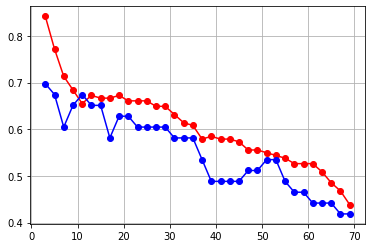

In [51]:
import matplotlib.pyplot as plt # library to do visualizations 
plt.grid(20)
# train accuracy plot 
plt.plot(np.arange(3,70,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(3,70,2),[i[1] for i in acc],"bo-")


based on the above graph we evaluate k = 2,3,4

In [52]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)
# accuracy on training data 
pred_train = knn.predict(X_train)
accuracy_score(Y_train, pred_train) ,accuracy_score(Y_test, pred)

(0.8654970760233918, 0.6511627906976745)

In [53]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
# accuracy on training data 
pred_train = knn.predict(X_train)
accuracy_score(Y_train, pred_train) ,accuracy_score(Y_test, pred)

(0.8421052631578947, 0.6511627906976745)

In [54]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, Y_train)
# accuracy on training data 
pred_train = knn.predict(X_train)
accuracy_score(Y_train, pred_train) ,accuracy_score(Y_test, pred)

(0.7719298245614035, 0.6511627906976745)

Based on the accuracy results we evaluate confusion matrix for k=2,3

In [55]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)
pd.crosstab(Y_train, pred_train, rownames=['Actual'], colnames = ['Predictions']) 

Predictions,1,2,3,5,6,7
Actual,,,,,,
1,54,2,1,0,0,0
2,12,44,0,2,0,0
3,10,3,0,0,0,0
5,0,2,0,7,1,1
6,0,1,0,1,6,0
7,1,1,0,0,1,21


In [56]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
pd.crosstab(Y_train, pred_train, rownames=['Actual'], colnames = ['Predictions']) 

Predictions,1,2,3,5,6,7
Actual,,,,,,
1,54,2,1,0,0,0
2,12,44,0,2,0,0
3,10,3,0,0,0,0
5,0,2,0,7,1,1
6,0,1,0,1,6,0
7,1,1,0,0,1,21


both the above tables are the same. so we choose k=2 as its computationally inexpensive.